## GRIP: The Spark Foundation

## Data science and Business Analytics Intern

## Author: Priya Meharwade

## Task8- Timeline Analysis: Covid-19

Create a storyboard showing spread of Covid-19 cases 
Dataset: Daily updated .csv file on https://bit.ly/30d2gdi


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:\\Users\\hp\\Downloads\\owid-covid-data.csv")
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243869,ZWE,Africa,Zimbabwe,2022-12-15,259356.0,0.0,0.0,5622.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
243870,ZWE,Africa,Zimbabwe,2022-12-16,259356.0,0.0,0.0,5622.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
243871,ZWE,Africa,Zimbabwe,2022-12-17,259356.0,0.0,0.0,5622.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
243872,ZWE,Africa,Zimbabwe,2022-12-18,259356.0,0.0,0.0,5622.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243874 entries, 0 to 243873
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    243874 non-null  object 
 1   continent                                   230161 non-null  object 
 2   location                                    243874 non-null  object 
 3   date                                        243874 non-null  object 
 4   total_cases                                 229857 non-null  float64
 5   new_cases                                   229512 non-null  float64
 6   new_cases_smoothed                          228313 non-null  float64
 7   total_deaths                                210432 non-null  float64
 8   new_deaths                                  210341 non-null  float64
 9   new_deaths_smoothed                         209155 non-null  float64
 

In [5]:
df.shape

(243874, 67)

In [6]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 67)


In [7]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.298570e+05,2.295120e+05,2.283130e+05,2.104320e+05,210341.000000,209155.000000,228810.000000,228465.00000,227271.000000,209398.000000,...,146521.000000,96564.000000,174598.000000,223714.000000,191394.000000,2.428270e+05,8.087000e+03,8087.000000,8116.000000,8087.000000
mean,4.859962e+06,1.215372e+04,1.218516e+04,7.692342e+04,131.715833,132.323840,66721.004822,185.11046,185.493241,720.373027,...,32.815595,50.888510,3.087993,73.610036,0.724664,1.407957e+08,4.977151e+04,10.085970,14.215795,1411.092772
std,3.015284e+07,8.371658e+04,8.172165e+04,3.937047e+05,709.002928,694.680668,115573.367131,1155.56537,684.807962,1001.694410,...,13.537097,31.872671,2.551269,7.446702,0.149598,6.924109e+08,1.370660e+05,13.403121,26.063144,1778.219605
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.00000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-28.450000,-95.920000,-1984.281517
25%,5.064000e+03,0.000000e+00,5.286000e+00,1.190000e+02,0.000000,0.000000,1209.489000,0.00000,1.138000,31.916000,...,21.600000,20.859000,1.300000,69.500000,0.602000,8.367830e+05,5.320000e+01,0.740000,0.030000,37.336276
50%,5.629600e+04,4.600000e+01,8.642900e+01,1.277000e+03,1.000000,1.286000,11839.674500,6.12200,17.638000,226.603000,...,33.100000,49.839000,2.500000,75.050000,0.742000,6.948395e+06,6.301800e+03,7.640000,7.415000,852.109416
75%,5.813650e+05,9.010000e+02,1.075714e+03,1.044300e+04,13.000000,14.571000,79574.139000,91.12400,130.366500,1073.414500,...,41.300000,83.241000,4.200000,79.070000,0.838000,3.369661e+07,3.612080e+04,15.770000,19.392500,2261.224282
max,6.537124e+08,4.083954e+06,3.439394e+06,6.667367e+06,17733.000000,14859.286000,698166.421000,228872.02500,36421.827000,6399.314000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.240683e+06,76.550000,376.710000,10032.844512


In [8]:
df.count()

iso_code                                   243874
continent                                  230161
location                                   243874
date                                       243874
total_cases                                229857
                                            ...  
population                                 242827
excess_mortality_cumulative_absolute         8087
excess_mortality_cumulative                  8087
excess_mortality                             8116
excess_mortality_cumulative_per_million      8087
Length: 67, dtype: int64

## Checking for count of NULL values for each column:

In [9]:
df.isnull()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,False,False,False,False,False,False,True,True,True,True,...,True,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,True,True,True,True,...,True,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,True,True,True,True,...,True,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,True,True,True,True,...,True,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,True,True,True,True,...,True,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243869,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
243870,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
243871,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
243872,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True


In [10]:
df.isnull().sum()

iso_code                                        0
continent                                   13713
location                                        0
date                                            0
total_cases                                 14017
                                            ...  
population                                   1047
excess_mortality_cumulative_absolute       235787
excess_mortality_cumulative                235787
excess_mortality                           235758
excess_mortality_cumulative_per_million    235787
Length: 67, dtype: int64

In [11]:
df1 = df[["date", "total_cases", "new_cases", "total_deaths", "new_tests", "total_tests"]]
df1

,date,total_cases,new_cases,total_deaths,new_tests,total_tests
0,2020-02-24,5.0,5.0,NaN,NaN,NaN
1,2020-02-25,5.0,0.0,NaN,NaN,NaN
2,2020-02-26,5.0,0.0,NaN,NaN,NaN
3,2020-02-27,5.0,0.0,NaN,NaN,NaN
4,2020-02-28,5.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
243869,2022-12-15,259356.0,0.0,5622.0,NaN,NaN
243870,2022-12-16,259356.0,0.0,5622.0,NaN,NaN
243871,2022-12-17,259356.0,0.0,5622.0,NaN,NaN
243872,2022-12-18,259356.0,0.0,5622.0,NaN,NaN


In [12]:
df1.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests
0,2020-02-24,5.0,5.0,NaN,NaN,NaN
1,2020-02-25,5.0,0.0,NaN,NaN,NaN
2,2020-02-26,5.0,0.0,NaN,NaN,NaN
3,2020-02-27,5.0,0.0,NaN,NaN,NaN
4,2020-02-28,5.0,0.0,NaN,NaN,NaN


In [13]:
df1.date = pd.to_datetime(df.date)
df1.set_index('date', inplace = True)
df1.head()
df1.tail()

,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2022-12-15,259356.0,0.0,5622.0,NaN,NaN
2022-12-16,259356.0,0.0,5622.0,NaN,NaN
2022-12-17,259356.0,0.0,5622.0,NaN,NaN
2022-12-18,259356.0,0.0,5622.0,NaN,NaN
2022-12-19,259356.0,0.0,5622.0,NaN,NaN


Text(0.5, 0, 'Month')

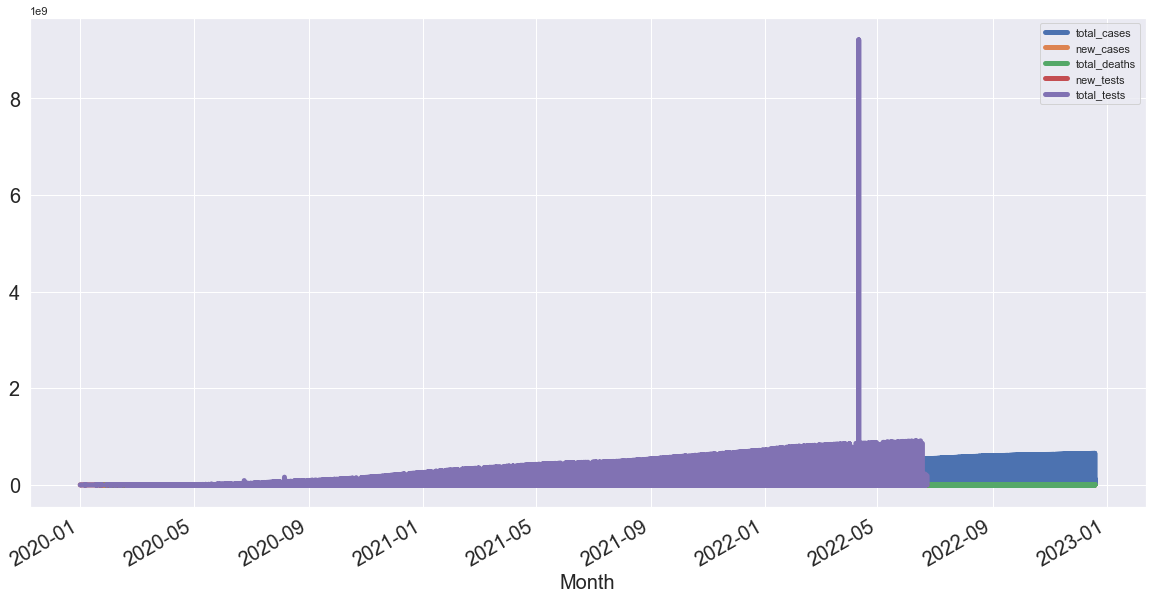

In [14]:
df1.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

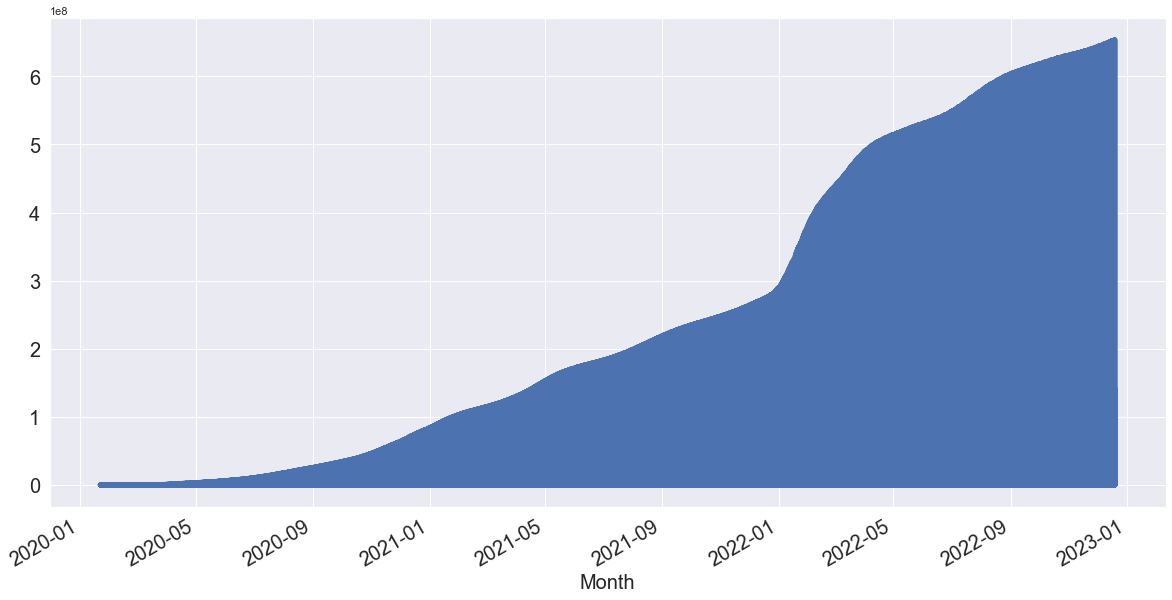

In [15]:
df1.total_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

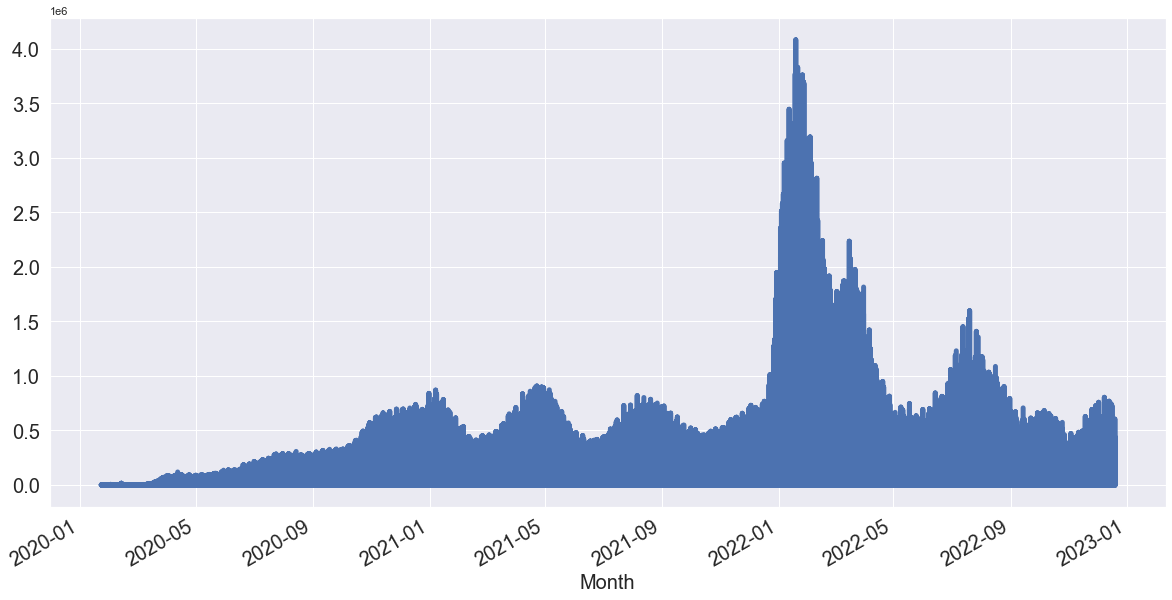

In [16]:
df1.new_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

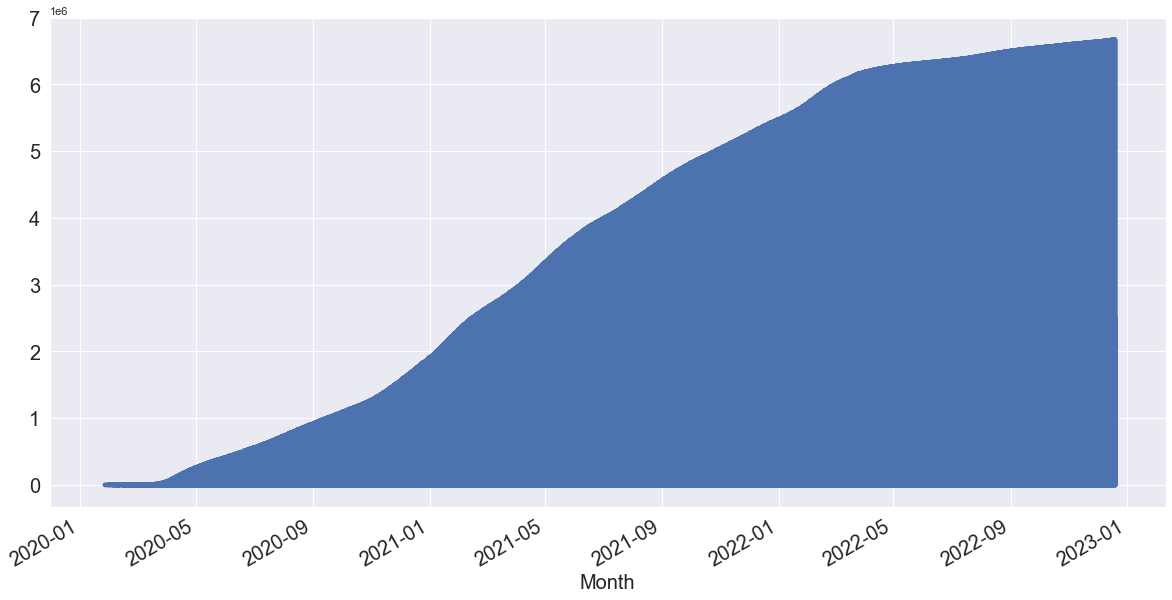

In [17]:
df1.total_deaths.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

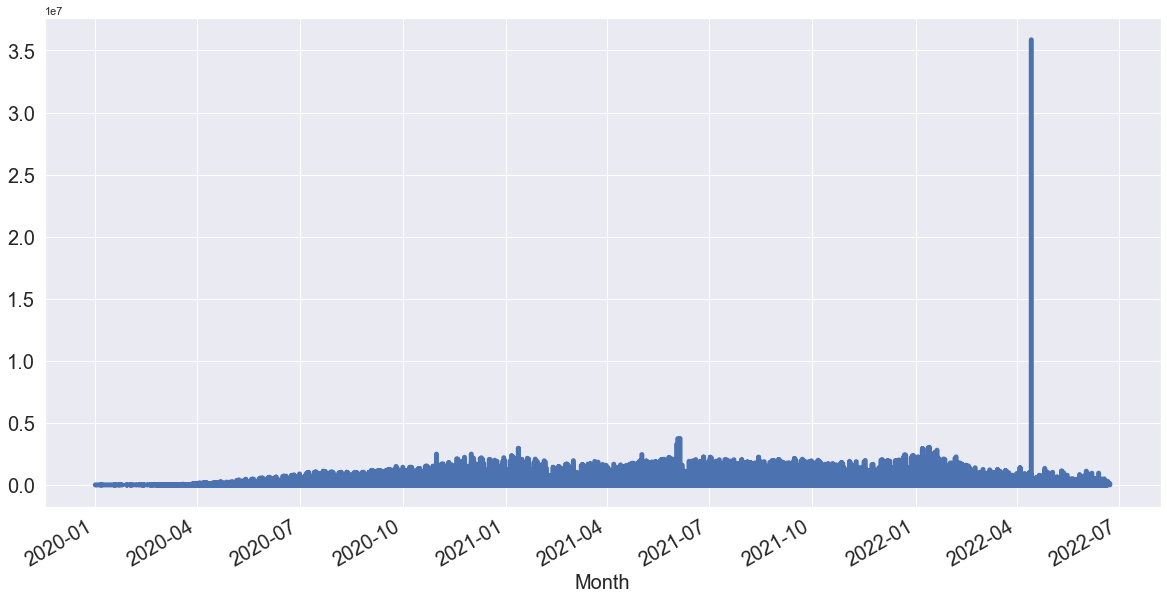

In [18]:
df1.new_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

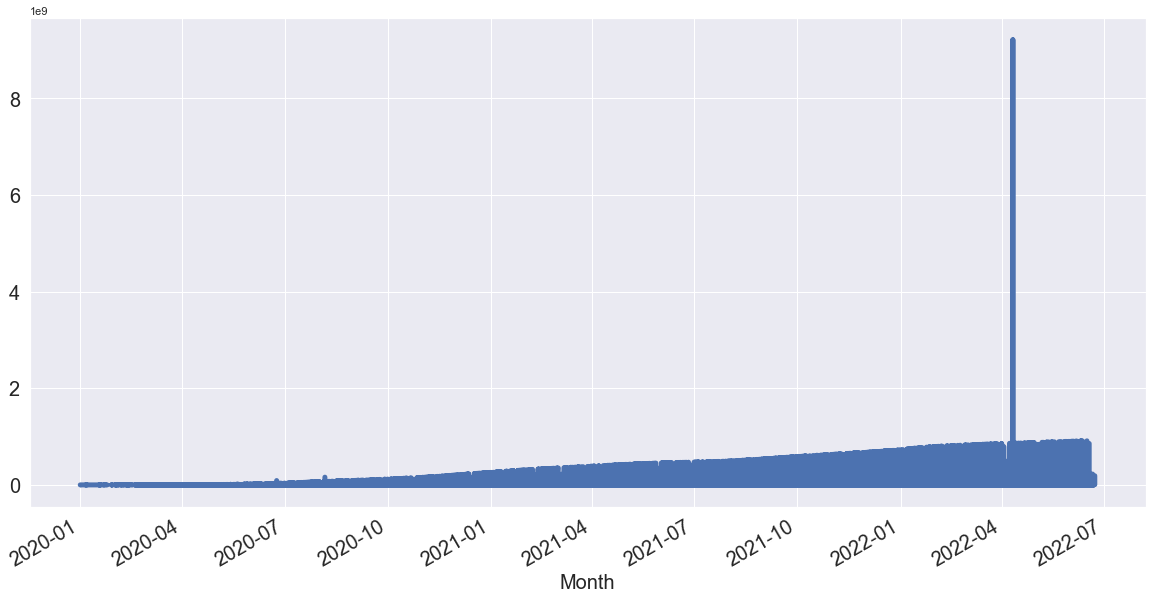

In [19]:
df1.total_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

### Trends and Seasonality in TimeSeries Data

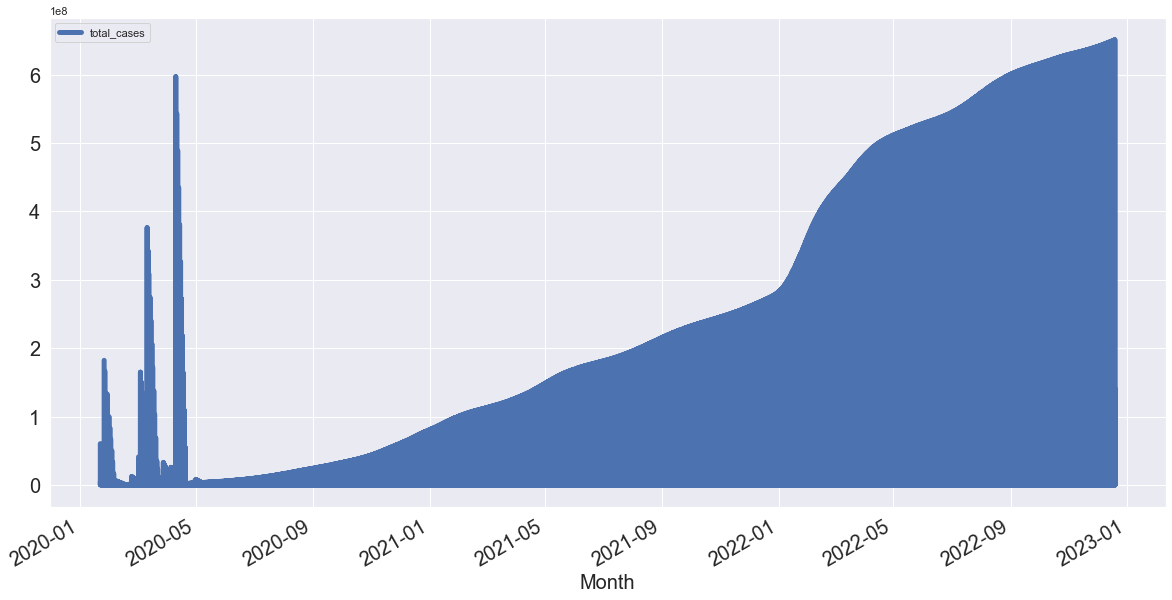

In [20]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

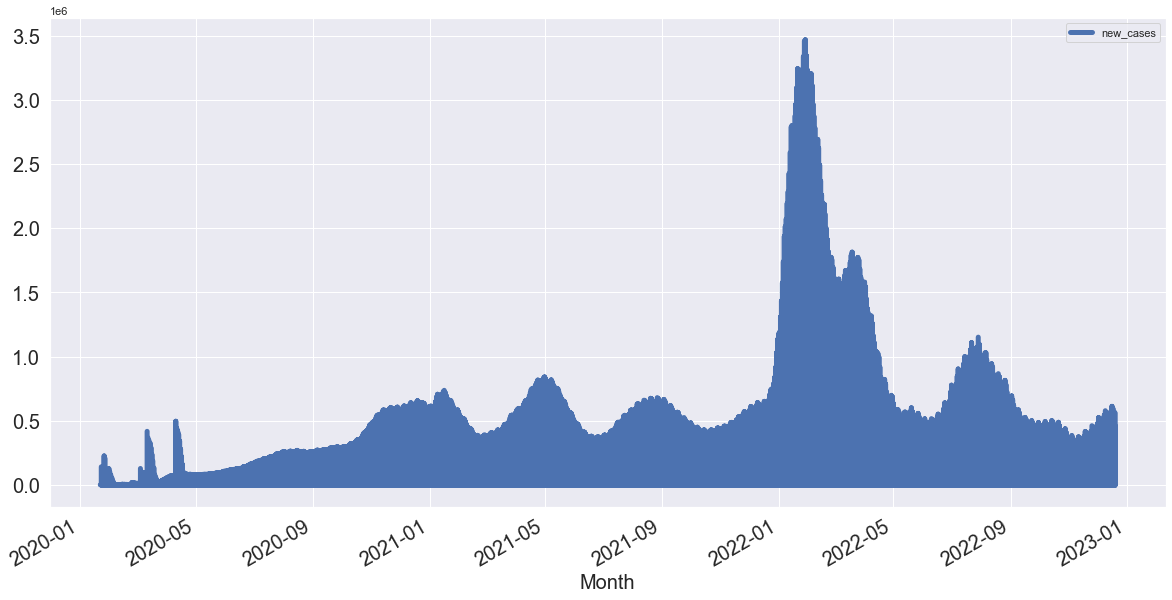

In [21]:
new_cases = df1[['new_cases']]
new_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

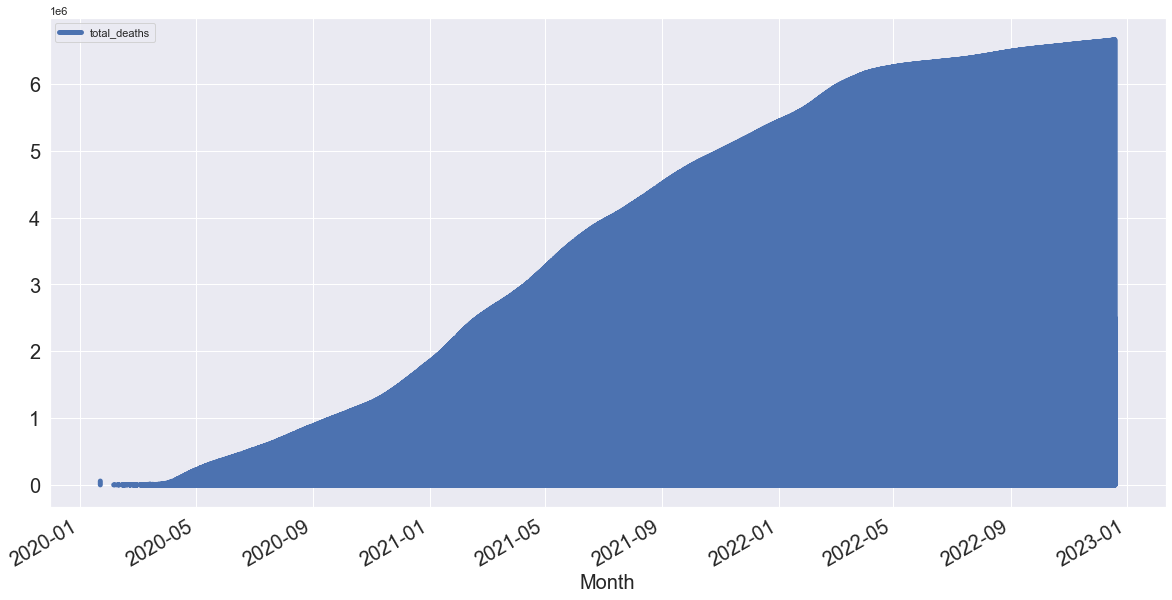

In [22]:
total_deaths = df1[['total_deaths']]
total_deaths.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);


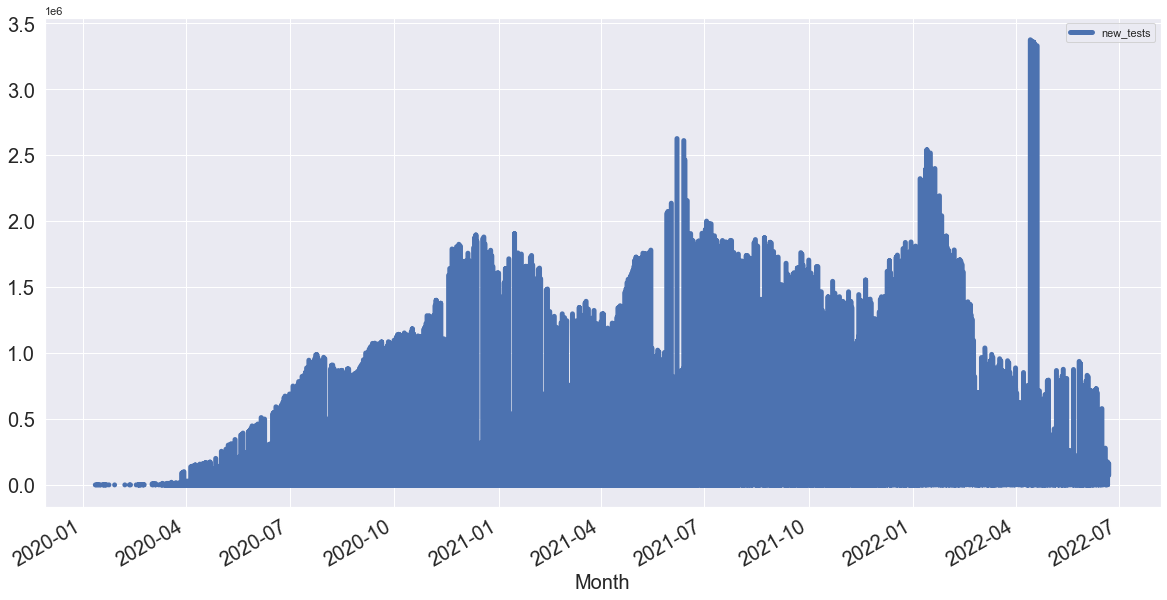

In [23]:
new_tests = df1[['new_tests']]
new_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

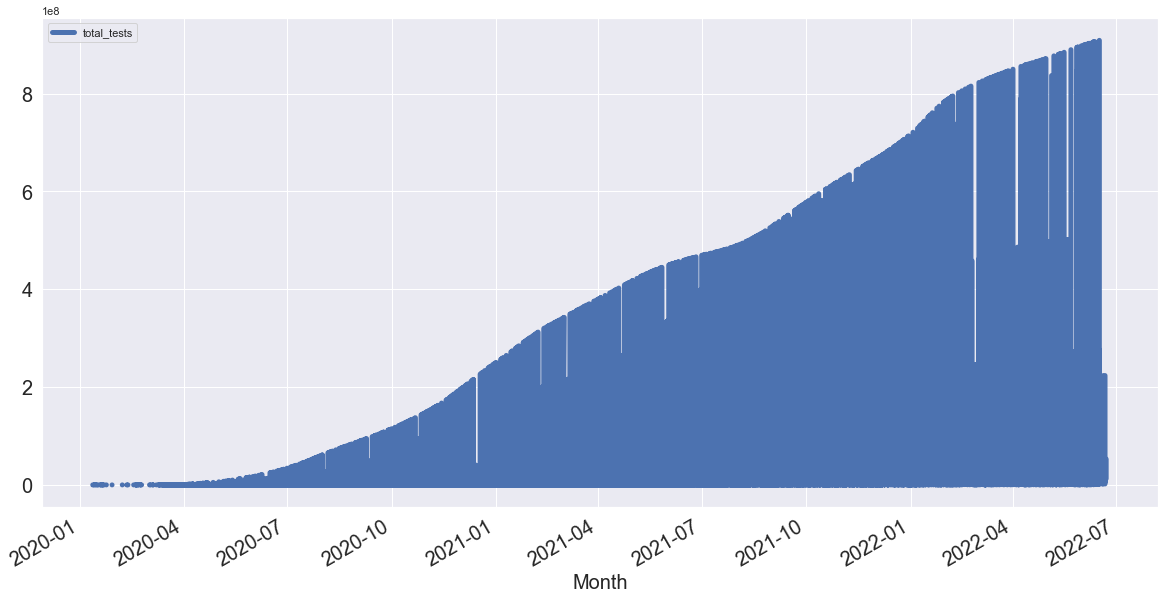

In [24]:
total_tests = df1[['total_tests']]
total_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

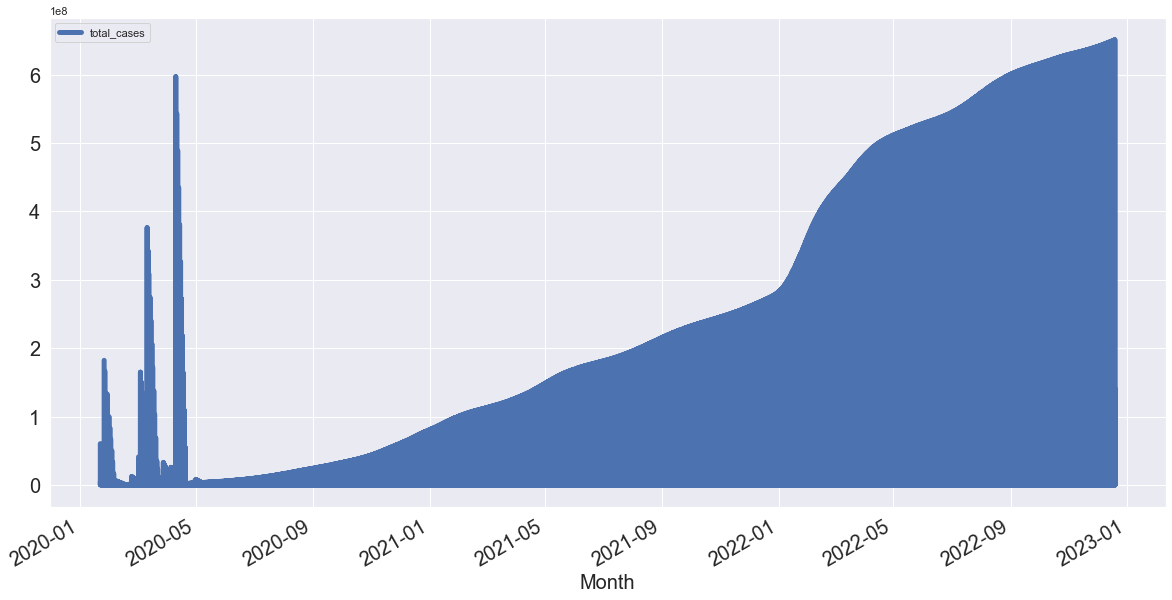

In [25]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);